In [1]:
import pandas as pd
from transformers import pipeline
from datasets import load_dataset
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import AutoTokenizer,DistilBertTokenizer
from transformers import AutoModel

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
emotion=load_dataset("emotion")

In [3]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds=emotion['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
for x in range(10):
    print(train_ds[x])

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}
{'text': 'i am feeling grouchy', 'label': 3}
{'text': 'ive been feeling a little burdened lately wasnt sure why that was', 'label': 0}
{'text': 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'label': 5}
{'text': 'i feel as confused about life as a teenager or as jaded as a year old man', 'label': 4}
{'text': 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'label': 1}
{'text': 'i feel romantic too', 'label': 2}


In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

In [9]:
emotion.set_format("pandas")
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
df=emotion["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
emotion["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [12]:
def label_int2str(row):
    return emotion['train'].features['label'].int2str(row)

In [13]:
df['label name']=df['label'].apply(label_int2str)
df.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [14]:
df['label name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: label name, Length: 16000, dtype: object>

In [15]:
df['label name'].value_counts()

label name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [16]:
df['label name'].value_counts(ascending=True)

label name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

<Axes: ylabel='label name'>

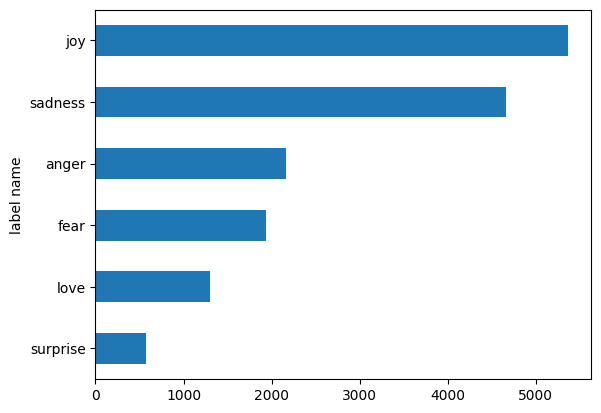

In [17]:
df['label name'].value_counts(ascending=True).plot.barh()

In [18]:
df["words per tweet"]=df['text'].str.split().apply(len)
df.head()

,text,label,label name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


showfliers doesnt show outliers false means no outliers
str is an array in python

<Axes: title={'center': 'words per tweet'}, xlabel='label name'>

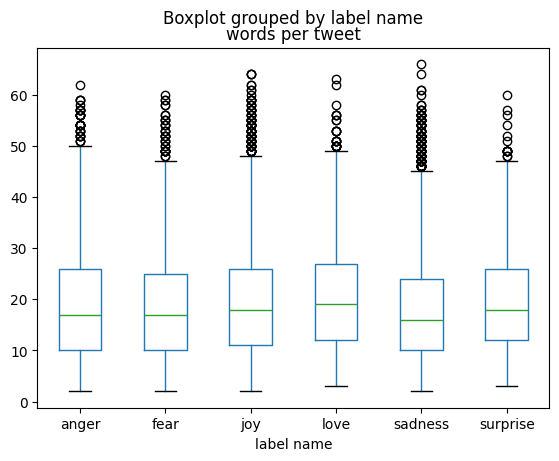

In [19]:
df.boxplot("words per tweet",by="label name",grid=False,)

In [20]:
emotion.reset_format()


In [21]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## Letter Tokenization

In [22]:
text = "Tokenizing text is a core task of NLP."
tokenized_text=list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [23]:
print(set(tokenized_text))

{'n', 'T', 'N', 'c', 't', 'r', 'L', 'f', 'i', 'o', '.', 'g', 'k', 'a', ' ', 'z', 's', 'e', 'P', 'x'}


In [24]:
print(sorted(set(tokenized_text)))

[' ', '.', 'L', 'N', 'P', 'T', 'a', 'c', 'e', 'f', 'g', 'i', 'k', 'n', 'o', 'r', 's', 't', 'x', 'z']


In [25]:
enumerate(sorted(set(tokenized_text)))#pairing to number

In [26]:
token2idx={ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [27]:
input_ids=[token2idx[char] for char in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [28]:
char='c'
token2idx[char]

7

In [29]:
len(token2idx)

20

In [30]:
input_ids=torch.tensor(input_ids)
input_ids.shape#38 characters are there in 

torch.Size([38])

In [31]:
one_hot=F.one_hot(input_ids,num_classes=len(token2idx))
one_hot.shape

torch.Size([38, 20])

In [32]:
print(f"Token: {tokenized_text[0]}")#the text that is split
print(f"Tensor index: {input_ids[0]}")#the corresponding int that is assignedd to it
print(f"One-hot: {one_hot[0]}")#converted to one hot form

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization

In [33]:
tokenized_text=text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

## Subword Tokenization

In [34]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [35]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [36]:
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [37]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


cls and sep are front and end

In [38]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [39]:
tokenizer.vocab_size

30522

In [40]:
tokenizer.model_max_length

512

In [41]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [42]:
def tokenize(batch):
    return tokenizer(batch['text'],padding=True,truncation=True)
#padding adds padding so that all is the size of the largest text
#truncation truncates to context size

In [43]:
print(tokenize(emotion['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


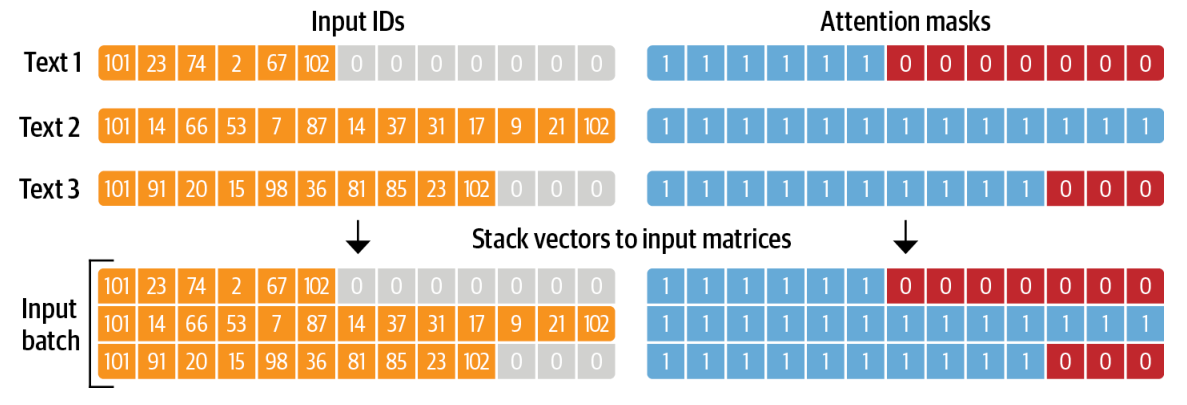

In [44]:
emotion_encoded=emotion.map(tokenize,batched=True,batch_size=None)
#map applies across every example, batched means process it has batch we set batchsize as none so that they all have the same padding

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

attention mask is like us specifiying the model hey pay attention here, if its 0 hey dont pay attention here its just padding

In [45]:
print(emotion_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## Model Training

In [46]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)